# Datenanalyse in interaktivem Umfeld

In diesem Notebook erfolgt eine Datenanalyse des in der Ausarbeitung vorgestellten Datensatzes. <br> Dabei werden interaktiv die Ergebnisse hergeleitet, die in der Ausarbeitung niedergeschrieben worden sind. 

Um den Fokus auf die eigentliche Datenanalyse zu legen, wurden einige Prozesse modularisiert. <br>
    Dazu wurde das __`darstellungsmodul2`__, ein in Python geschriebenes Skript, erstellt. Das Darstellungsmodul findet sich als <br> Quellcode ebenfalls auf Github und umfasst folgende Funktionen:
* `heatmap`
* `Kuchendiagram`
* `Balkendiagram`
* `descr_stat`
* `preprocessing`
* `dictionary`

Einen kurzen Überblick, um mögliche Unklarheiten im Code dennoch zu vermeiden, <br> erfolgt mittels der folgenden kurzen Tabelle:

|Funktion|Nutzen
| :--- | :------------
| `heatmap` | Erstellt eine Korrelationsmatrix eines <br> gegebenen Datensatzes. 
| `Kuchendiagram` | Erstellt ein spezielles Kuchendiagramm.
| `Balkendiagram` |  Erstellt ein spezielles Balkendiagramm.
| `descr_stat` | Gibt einen Überblick über einen gegebenen <br> Datensatz in Form von deskriptiver Statistik. 
| `preprocessing` | Bereitet Werte für die Funktion *Balkendiagram* <br> auf. 
| `dictionary` | Erstellt ein Lexikon indem zwei Listen <br> zusammengefügt werden.

In [1]:
# Importieren der benötigten Module
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import joblib
#import pandas_profiling
import darstellungsmodul2 as drst

In [5]:
# Datensätze einlesen
df = pd.read_csv(
    os.path.join('csv_data', 'PA Umfrage ALLE .csv'),
    sep=';')
df_ef = pd.read_csv(
    os.path.join('csv_data', 'EF.csv'),
    sep=';')
df_q1_gk = pd.read_csv(
    os.path.join('csv_data', 'Q1 GK.csv'),
    sep=';')
df_q1_lk = pd.read_csv(
    os.path.join('csv_data', 'Q1 LK.csv'),
    sep=';')

# Beobachtungen x Features pro Datensatz
print(df.shape)
print(df_ef.shape)
print(df_q1_gk.shape)
print(df_q1_lk.shape)
mean = df.groupby('Geschlecht').mean()
print(mean)

(74, 22)
(37, 22)
(19, 22)
(18, 22)
            Interesse  Fähigkeiten       neu  lebensnah  Abwechslung  \
Geschlecht                                                             
1            4.666667     3.982456  4.070175   4.438596     3.771930   
2            3.823529     2.823529  4.117647   3.764706     3.470588   

            Erziehung   Studium   Theorie  Bewältigung      Note  ...  \
Geschlecht                                                        ...   
1            4.035088  3.368421  3.473684     3.140351  1.754386  ...   
2            3.529412  2.000000  2.882353     2.352941  2.058824  ...   

            Persönlichkeit  Lehrkräfte  Mitschüler  Information  \
Geschlecht                                                        
1                 2.807018    3.105263    2.087719     3.368421   
2                 2.882353    2.882353    2.176471     2.882353   

            Erneut wählen  Jahrgang      Kurs     Punkte   weiter    Kurs.1  
Geschlecht                         

Die Daten aus `df` sind mit `df_ef`, `df_q1_gk` und `df_q1_lk` in verschiedene Teile aufgeteilt worden. Dies hat inhaltliche Gründe.

|Abschnitt|Code |Thema
| :--- | :--:| :------------
| 1 |`df_ef` | Datensatz Einführungsphase 
| 2 |`df_q1_gk` | Datensatz Qualifikationsphase Grundkurs
| 3 |`df_q1_lk` | Datensatz Qualifikationsphase Leistungskurs

<div class="alert alert-block alert-warning">
    <b>Achtung:</b>  Das bedeutet an dieser Stelle jedoch nicht, dass der Datensatz <b>df</b> keine Relevanz mehr hat oder nicht mehr existiert. <br> Es handelt sich hierbei stets um eine inhaltliche Aufteilung für eine spezifischere Datenanalyse. 
</div>

In [8]:
profile = pandas_profiling.ProfileReport(df)

In [9]:
profile.to_widgets()

In [6]:
# Datensätze als Liste
datensatz_liste = [df, df_ef, df_q1_gk, df_q1_lk]

for datensatz, i in zip(datensatz_liste, range(4)):
    print('Datensatz ' + str(i + 1) + ' deskriptive Statistik')
    print(datensatz.describe())

Datensatz 1 deskriptive Statistik
       Interesse  Fähigkeiten        neu  lebensnah  Abwechslung  Erziehung  \
count  74.000000    74.000000  74.000000  74.000000    74.000000  74.000000   
mean    4.472973     3.716216   4.081081   4.283784     3.702703   3.918919   
std     0.797650     1.053634   1.119647   0.883955     1.030091   1.167561   
min     1.000000     1.000000   1.000000   1.000000     1.000000   1.000000   
25%     4.000000     3.000000   4.000000   4.000000     3.000000   3.000000   
50%     5.000000     4.000000   4.000000   4.500000     4.000000   4.000000   
75%     5.000000     4.000000   5.000000   5.000000     4.000000   5.000000   
max     5.000000     5.000000   5.000000   5.000000     5.000000   5.000000   

         Studium    Theorie  Bewältigung       Note  ...  Lehrkräfte  \
count  74.000000  74.000000    74.000000  74.000000  ...   74.000000   
mean    3.054054   3.337838     2.959459   1.824324  ...    3.054054   
std     1.460830   1.037344     1.2099

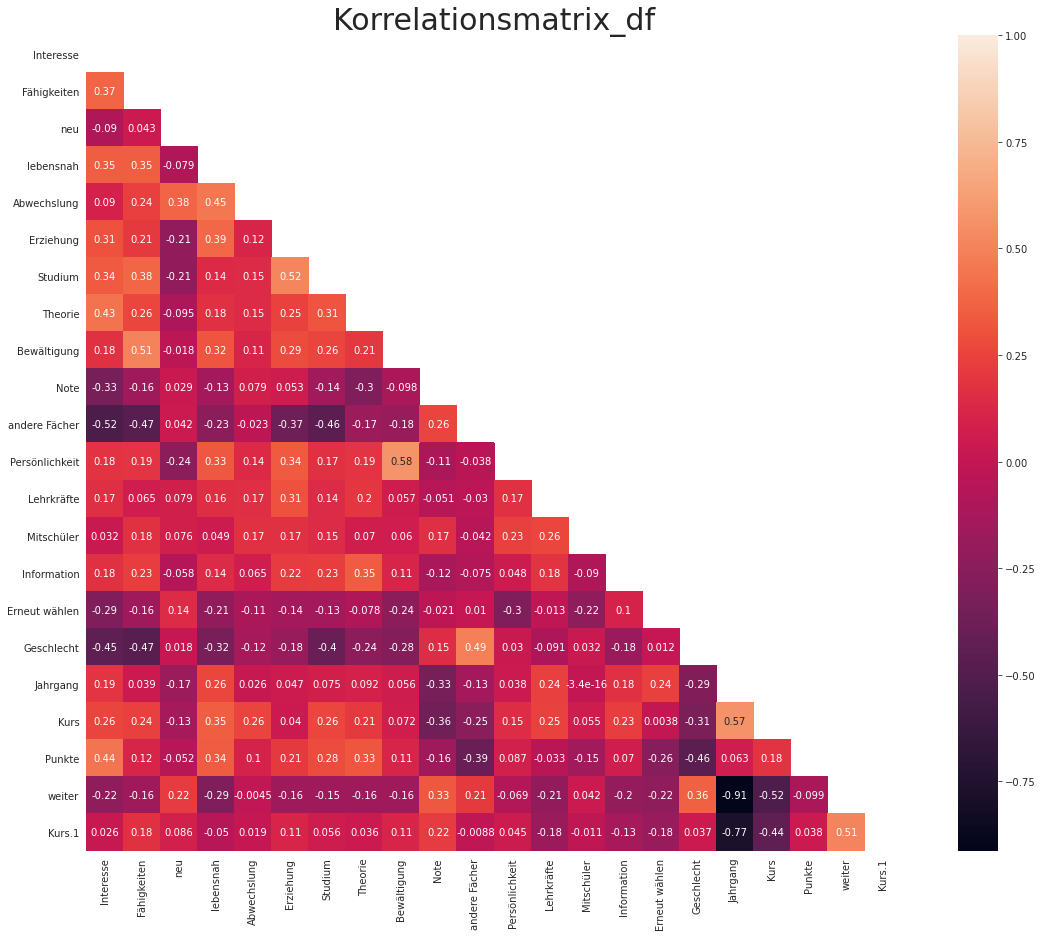

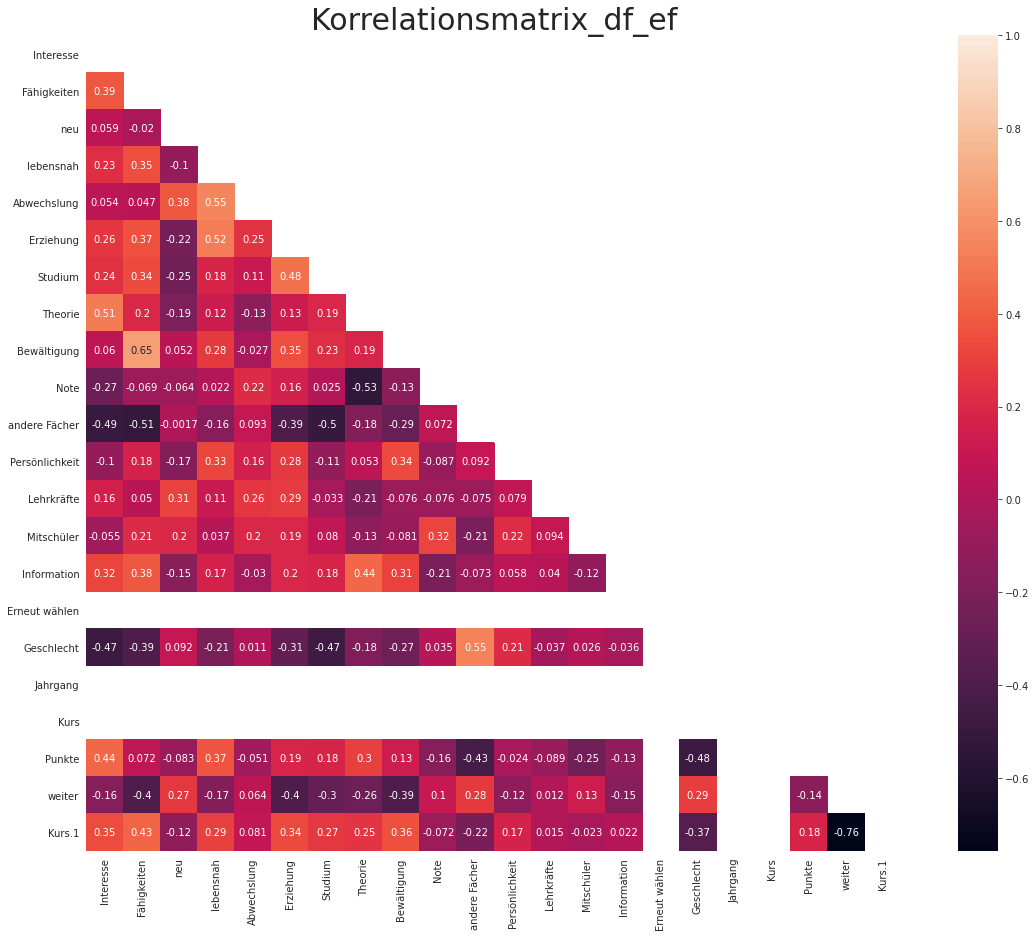

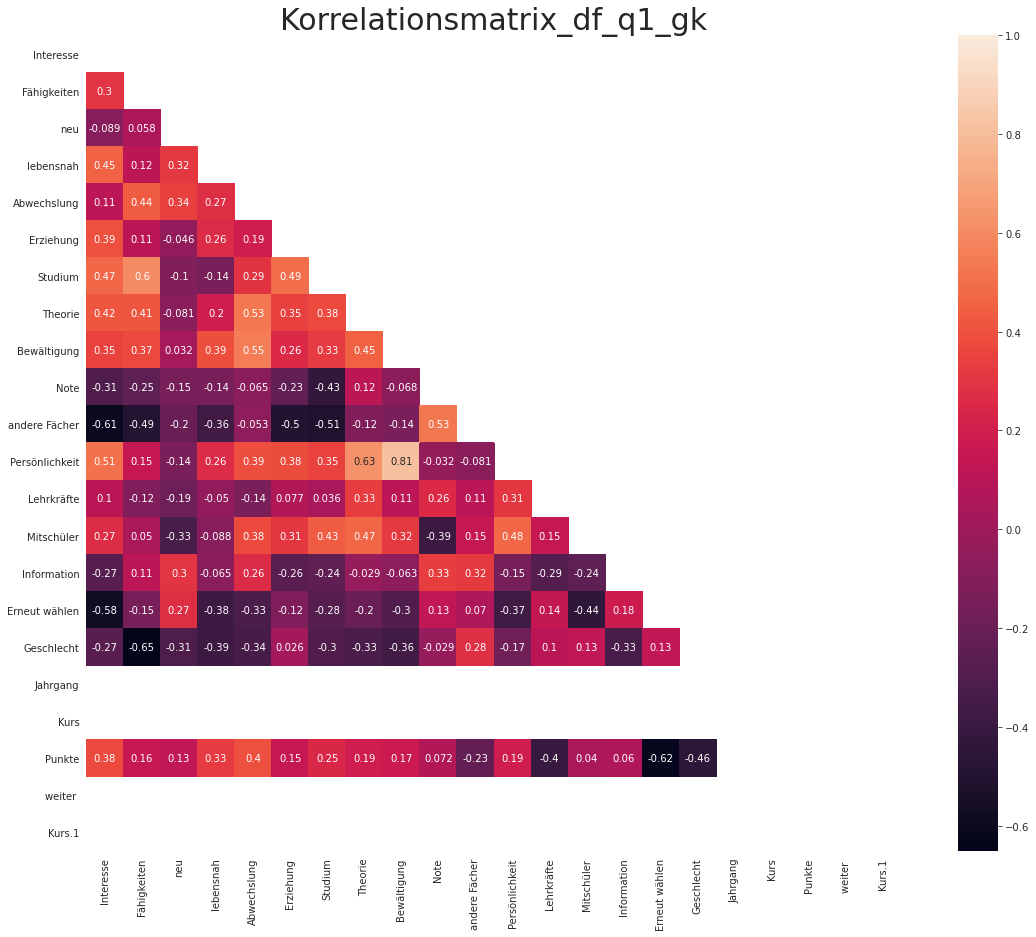

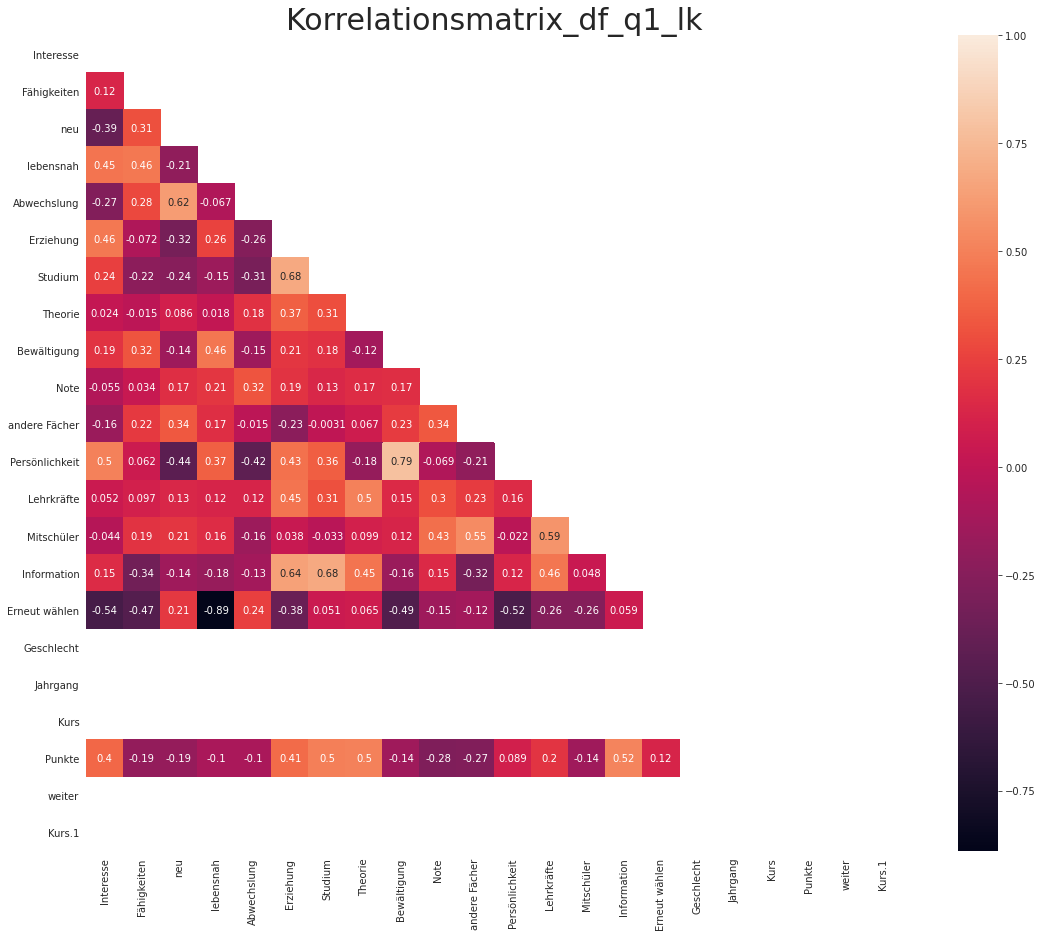

In [7]:
# Funktionsaufruf
# Größe
size = (20, 15)
datensatz_namen = ["df", "df_ef", "df_q1_gk", "df_q1_lk"]
drst.heatmap(datensatz_liste, size, datensatz_namen)

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>heatmap</b> benutzt.</div>

In [8]:
# Prüfen auf NA Werte
for datensatz in datensatz_liste:
    print(datensatz.isnull().sum())

Interesse         0
Fähigkeiten       0
neu               0
lebensnah         0
Abwechslung       0
Erziehung         0
Studium           0
Theorie           0
Bewältigung       0
Note              0
andere Fächer     0
Persönlichkeit    0
Lehrkräfte        0
Mitschüler        0
Information       0
Erneut wählen     0
Geschlecht        0
Jahrgang          0
Kurs              0
Punkte            0
weiter            0
Kurs.1            0
dtype: int64
Interesse         0
Fähigkeiten       0
neu               0
lebensnah         0
Abwechslung       0
Erziehung         0
Studium           0
Theorie           0
Bewältigung       0
Note              0
andere Fächer     0
Persönlichkeit    0
Lehrkräfte        0
Mitschüler        0
Information       0
Erneut wählen     0
Geschlecht        0
Jahrgang          0
Kurs              0
Punkte            0
weiter            0
Kurs.1            0
dtype: int64
Interesse         0
Fähigkeiten       0
neu               0
lebensnah         0
Abwechslung   

In [9]:
# Hypothesen prüfen
# Hypothese 1: Fachliche, sachbezogene Gründe stehen bei der Wahl des
# Faches Pädagogik im Vordergrund
col_list = list(df.columns.values)

new_col = ['sachbezogen1', 'sachbezogen2', 'sachfremd1', 'sachbezogen3',
           'sachfremd2', 'sachbezogen4', 'sachbezogen5', 'sachbezogen6',
           'sachbezogen7', 'sachfremd3', 'sachfremd4', 'sachbezogen8',
           'sachfremd5', 'sachfremd6']


mean_values = df.iloc[:, 0:14].mean(axis=0)
print(mean_values)

Interesse         4.472973
Fähigkeiten       3.716216
neu               4.081081
lebensnah         4.283784
Abwechslung       3.702703
Erziehung         3.918919
Studium           3.054054
Theorie           3.337838
Bewältigung       2.959459
Note              1.824324
andere Fächer     1.945946
Persönlichkeit    2.824324
Lehrkräfte        3.054054
Mitschüler        2.108108
dtype: float64


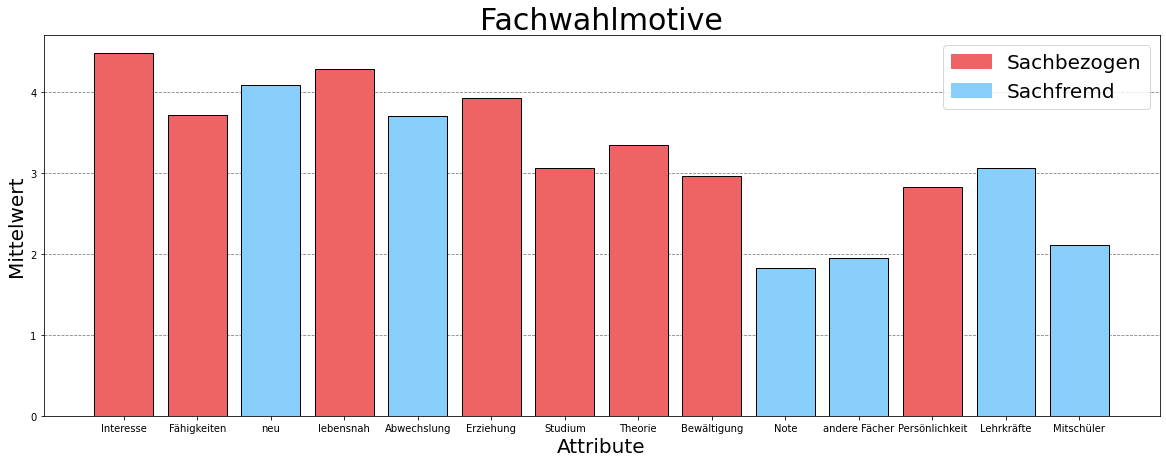

In [11]:
# Mappen von Farben zu Features
colors = []
for i in range(13):
    if 'sachbezogen' in new_col[i]:
        colors.append('#EE6363')
    elif 'sachfremd' in new_col[i]:
        colors.append('#87CEFA')

d2c = dict(zip(col_list[:15], colors))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
plt.bar(df.columns[:14], mean_values, color=[d2c.get(x, '#87CEFA')
        for x in col_list], edgecolor='k')
plt.title('Fachwahlmotive', fontsize=30)
plt.xlabel('Attribute', fontsize=20)
plt.ylabel('Mittelwert', fontsize=20)
color_1 = mpatches.Patch(color='#EE6363', label='Sachbezogen')
color_2 = mpatches.Patch(color='#87CEFA', label='Sachfremd')
plt.legend(handles=[color_1, color_2], fontsize=20)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.show()
fig.savefig('Hypothese_1.svg', bbox_inches='tight', format='svg')

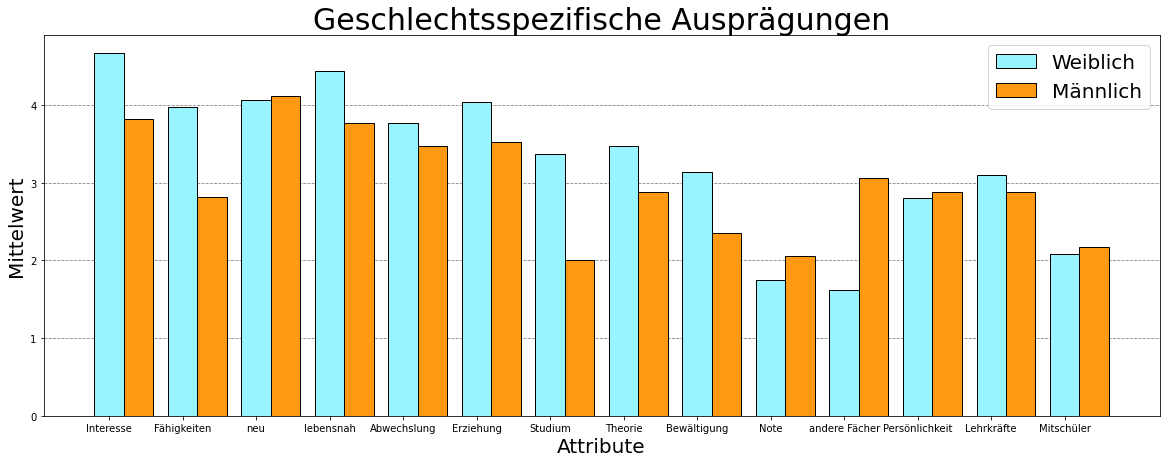

In [12]:
# Hypothesen prüfen
# Hypothese 2a: Bei den Wahlgründen für den Pädagogikkurs zeigen sich
# geschlechtsspezifische Unterschiede
means = df.groupby('Geschlecht').mean()
male_1d = [x for y in means.iloc[1:, :14].values for x in y]
female_1d = [x for y in means.iloc[:1, :14].values for x in y]
Spalten = list(df.columns[:14])

# Plot
drst.Balkendiagramm('#FF9912', '#98F5FF', Spalten,
                    Spalten, df, (20, 7), 14, female_1d, male_1d, 'Geschlechtsspezifische Ausprägungen',
                    'Attribute', 'Mittelwert', ["Weiblich", "Männlich"], 'Hypothese_2_a_Geschlecht.svg')

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>Balkendiagramm</b> benutzt.</div>

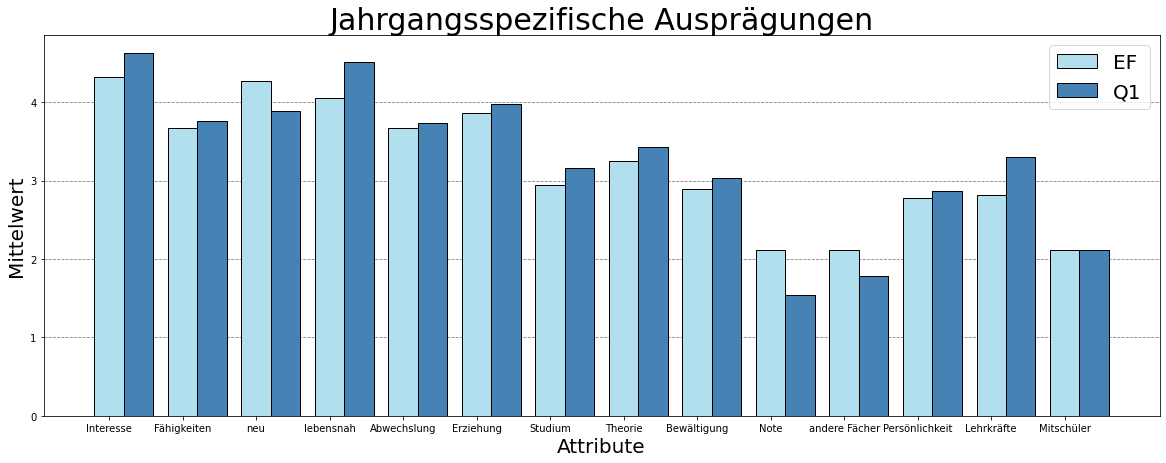

In [13]:
# Hypothesen prüfen
# Hypothese 2b: Bei den Wahlgründen für den Pädagogikkurs zeigen sich
# keine jahrgangsstufenspezifischen Unterschiede
means = df.groupby('Jahrgang').mean()
EF_Jahrgang_1d = [x for y in means.iloc[:1, :14].values for x in y]
Q1_Jahrgang_1d = [x for y in means.iloc[1:, :14].values for x in y]
Spalten = list(df.columns[:14].values)

# Plot
drst.Balkendiagramm('#4682B4', '#B2DFEE', Spalten,
                    Spalten, df, (
                        20, 7), 14, EF_Jahrgang_1d, Q1_Jahrgang_1d, 'Jahrgangsspezifische Ausprägungen',
                    'Attribute', 'Mittelwert', ["EF", "Q1"], 'Hypothese_2_b_Jahrgang.svg')

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>Balkendiagramm</b> benutzt.</div>

       Interesse  Fähigkeiten       neu  lebensnah  Abwechslung  Erziehung  \
count  37.000000    37.000000  37.00000  37.000000    37.000000  37.000000   
mean    4.324324     3.675676   4.27027   4.054054     3.675676   3.864865   
std     0.883618     1.131716   0.93240   1.025940     1.106899   1.158595   
min     1.000000     1.000000   1.00000   1.000000     1.000000   1.000000   
25%     4.000000     3.000000   4.00000   4.000000     3.000000   3.000000   
50%     5.000000     4.000000   4.00000   4.000000     4.000000   4.000000   
75%     5.000000     5.000000   5.00000   5.000000     4.000000   5.000000   
max     5.000000     5.000000   5.00000   5.000000     5.000000   5.000000   

         Studium    Theorie  Bewältigung       Note  ...  Lehrkräfte  \
count  37.000000  37.000000    37.000000  37.000000  ...   37.000000   
mean    2.945946   3.243243     2.891892   2.108108  ...    2.810811   
std     1.393356   0.983345     1.196843   0.965625  ...    0.844520   
min     1

/opt/anaconda3/envs/datenexploration/darstellungsmodul2.py:64: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts, pcts = ax.pie(


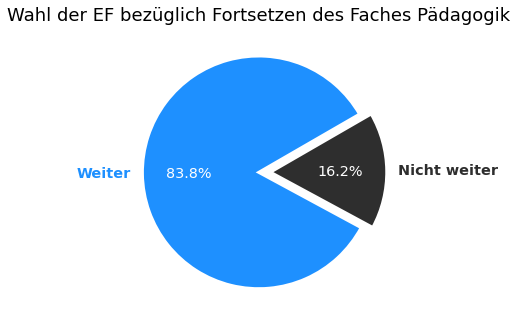

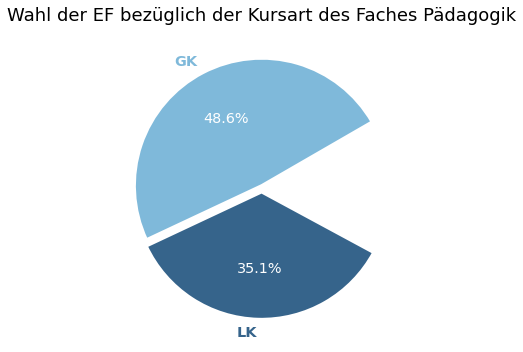

In [14]:
# Hypothesen prüfen
# Hypothese 3: Viele SchülerInnen entscheiden sich nach der EF weiterhin
# für die Wahl des Faches Pädagogik in der Q1

print(df_ef.describe())  # 1 == weiter, 2 == nicht weiter, 37 Ausprägungen
#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#
# Hypothese 3_a Fortsetzen
#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#
# Absolut
# 31 Personen wollen es weiter wählen
weiter = np.count_nonzero(df_ef['weiter'] == 1)
# 6 Personen wollen es nicht weiter wählen
nicht_weiter = np.count_nonzero(df_ef['weiter'] == 2)

# Als Liste
Wahl = [weiter, nicht_weiter]


# Plot Hypothese 3_a_Fortsetzen
drst.Kuchendiagramm(Wahl, (6, 6), 'Greys', 'dodgerblue', ['Weiter', 'Nicht weiter'], 30,
                    'Wahl der EF bezüglich Fortsetzen des Faches Pädagogik',
                    'Hypothese_3_a_Fortsetzen.svg', (0, 0.1), 0)

#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#
# Hypothese 3_b Kursart
#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#%#

# Absolut
nicht_weiter = np.count_nonzero(df_ef['Kurs.1'] == 0)
print(nicht_weiter)
weiter_und_gk = np.count_nonzero(df_ef['Kurs.1'] == 1)
print(weiter_und_gk)
weiter_und_lk = np.count_nonzero(df_ef['Kurs.1'] == 2)
print(weiter_und_lk)

# Dezimal
nicht_weiter_dec = nicht_weiter / len(df_ef['Kurs.1'])
weiter_und_gk_dec = weiter_und_gk / len(df_ef['Kurs.1'])
weiter_und_lk_dec = weiter_und_lk / len(df_ef['Kurs.1'])

# Als Liste
Zukunft = [weiter_und_gk_dec, weiter_und_lk_dec]

# Plot Hypothese 3_b = Kursart
drst.Kuchendiagramm(Zukunft, (5, 5), 'Blues', '#36648B', ['GK', 'LK'], 30,
                    'Wahl der EF bezüglich der Kursart des Faches Pädagogik',
                    'Hypothese_3_b_Kursart.svg', (0, 0.05), 1)

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>Kuchendiagramm</b> benutzt.</div>

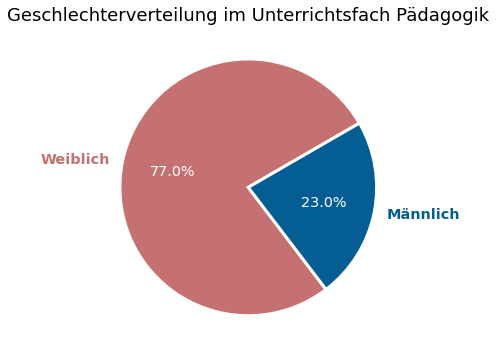

In [15]:
# Hypothesen prüfen
# Hypothese 4: Bei der Wahl des Faches Pädagogik lässt sich eine starke Überrepräsentation weiblicher
# Teilnehmerinnen ausmachen

df['Geschlecht'].describe()  # 1 = weiblich, 2 = männlich

# Absolut
weiblich = np.count_nonzero(df['Geschlecht'] == 1)
männlich = np.count_nonzero(df['Geschlecht'] == 2)

# Als Liste
Geschlecht = [weiblich, männlich]

# Plot
# Plot Hypothese 4
drst.Kuchendiagramm(Geschlecht, (6, 6), 'PuBu', '#C67171', ['Weiblich', 'Männlich'], 30,
                    'Geschlechterverteilung im Unterrichtsfach Pädagogik',
                    'Hypothese_4.svg', (0, 0.0), 0)

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>Kuchendiagramm</b> benutzt.</div>